# Salary Servey 2021



* Which industry pays the most?
* How does salary increase given years of experience?
* How do salaries compare for the same role in different locations?
* How much do salaries differ by gender and years of experience?
* How do factors like education level correlate with salary?



## Import Necessary Libraries

In [ ]:
!pip install rapidfuzz -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 23.4 MB/s eta 0:00:00


In [ ]:
# Pandas for data cleaning and manipulation
import pandas as pd

# Used for text processing
from rapidfuzz import process


# Import re for Regex
import re

## Data Transfoormation and Cleaning

In [ ]:
# Read the data
df = pd.read_csv('/content/Ask A Manager Salary Survey 2021 (Responses) - Form Responses 1.csv')

In [ ]:
# Have a look
df

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28056,7/12/2024 18:25:42,35-44,Retail,Cashier Assistant,NaN,18300,0.0,CAD,NaN,NaN,Canada,NaN,Kitchener,8 - 10 years,8 - 10 years,Master's degree,Man,"Hispanic, Latino, or Spanish origin"
28057,7/12/2024 22:52:01,35-44,Health care,Veterinarian,NaN,135000,NaN,USD,NaN,NaN,United States,Missouri,Wentzville,11 - 20 years,11 - 20 years,"Professional degree (MD, JD, etc.)",Woman,White
28058,7/23/2024 17:51:03,25-34,Computing or Tech,Systems Architect,NaN,109000,NaN,USD,NaN,NaN,USA,Georgia,Atlanta,5-7 years,5-7 years,College degree,Man,White
28059,7/24/2024 12:22:58,18-24,"Accounting, Banking & Finance",Risk Management Associate,NaN,1200,0.0,USD,NaN,NaN,Myanmar,Colorado,Yangon,2 - 4 years,2 - 4 years,Some college,Man,Asian or Asian American


#### As we see here the data is about survey for employees, so first we need to clean columns names including renaming.

In [ ]:
# Print columns to understand
for column in df.columns:
  print(column)
  print('-'*50)

Timestamp
--------------------------------------------------
How old are you?
--------------------------------------------------
What industry do you work in?
--------------------------------------------------
Job title
--------------------------------------------------
If your job title needs additional context, please clarify here:
--------------------------------------------------
What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)
--------------------------------------------------
How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.
--------------------------------------------------
Please indicate the currency
--------------------------------------------------
If "Other,"

In [ ]:
# List of columns for removing unnecessary columns
removed_columns = [
                   'If your job title needs additional context, please clarify here:',
                   'If your income needs additional context, please provide it here:',
                   'If "Other," please indicate the currency here: ',
                   'If your job title needs additional context, please clarify here:',
                   'If your income needs additional context, please provide it here:',
                   'If "Other," please indicate the currency here: ',
                   "If you're in the U.S., what state do you work in?",
                   'What city do you work in?',
                   'What is your race? (Choose all that apply.)',
                   'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.']


# Create a dict for renaming columns
new_columns = {
    'How old are you?':'Age Range',
    'What industry do you work in?':'Industry',
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":'Anal Salary',
    'Please indicate the currency':'Currency',
    'If "Other," please indicate the currency here':'Other Currency',
    'What country do you work in?':'Job Country',
    'How many years of professional work experience do you have overall?':'Overall Years Experience',
    'How many years of professional work experience do you have in your field?':'Field Years Experience',
    'What is your highest level of education completed?':'Highest Education Level',
    'What is your gender?':'Gender'
}

# Rename columns
df.rename(columns = new_columns, inplace = True)

# Drop Columns
df.drop(columns = removed_columns, inplace = True)

In [ ]:
df.head()

,Timestamp,Age Range,Industry,Job title,Anal Salary,Currency,Job Country,Overall Years Experience,Field Years Experience,Highest Education Level,Gender
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,"55,000",USD,United States,5-7 years,5-7 years,Master's degree,Woman
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,"54,600",GBP,United Kingdom,8 - 10 years,5-7 years,College degree,Non-binary
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,"34,000",USD,US,2 - 4 years,2 - 4 years,College degree,Woman
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,"62,000",USD,USA,8 - 10 years,5-7 years,College degree,Woman
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,"60,000",USD,US,8 - 10 years,5-7 years,College degree,Woman


In [ ]:
df.shape

In [ ]:
# info the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28061 entries, 0 to 28060
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Timestamp                 28061 non-null  object
 1   Age Range                 28061 non-null  object
 2   Industry                  27987 non-null  object
 3   Job title                 28060 non-null  object
 4   Anal Salary               28061 non-null  object
 5   Currency                  28061 non-null  object
 6   Job Country               28061 non-null  object
 7   Overall Years Experience  28061 non-null  object
 8   Field Years Experience    28061 non-null  object
 9   Highest Education Level   27839 non-null  object
 10  Gender                    27890 non-null  object
dtypes: object(11)
memory usage: 2.4+ MB


**The data need some cleaning, including handling missing values and type conversion, then we will apply some transformation**



### 1 - Handling Missing and Incorrect Values, and type conversion


In [ ]:
# Print total missing data for each column.
df.isnull().sum() / len(df) * 100

,0
Timestamp,0
Age Range,0
Industry,74
Job title,1
Anal Salary,0
Currency,0
Job Country,0
Overall Years Experience,0
Field Years Experience,0
Highest Education Level,222


**Numarical:**
* Anal Salary need to cleaning and type conversion

**Categorical:**
There are many categorical missing data, so we will find a way to fill and check wrong values.

<br><br>
**Process:**<br>
First we will fill the numaric values. Additional Monetary Compensation column must be Zero if there are no and another income. Zero will not affect the total. <br><br><br>




**1- Numarical Columns**<br>

1. Anal Salary


In [ ]:
# Anal Salary need to change on type conversion
# First we need to remove "," from the Salaries to convert to integer.
df['Anal Salary'] = pd.to_numeric(df['Anal Salary'].str.replace(',', ''))

**2- Categorical Columns:**

1. Age Range



In [ ]:
# Check the unique values of this column
df['Age Range'].unique()

array(['25-34', '45-54', '35-44', '18-24', '65 or over', '55-64',
       'under 18'], dtype=object)

**Age Range** Seems clear and well structured

In [ ]:
# Type conversion
df['Age Range'] = df['Age Range'].astype('category')

2. Industry

In [ ]:
# Fill Nan values by "Other", will not affect our data because it is a little rows.
df['Industry'].fillna(value="Other", inplace=True)

# Check the unique values of this column
len(df['Industry'].unique())

1220

There are 1220 unique values, we need to go a little bit deep by check the value counts.

In [ ]:
# We will check the top 100 value counts
for k,v in df['Industry'].value_counts()[:100].items():
  print(v, " : ", k)

4699  :  Computing or Tech
2464  :  Education (Higher Education)
2419  :  Nonprofits
1895  :  Health care
1889  :  Government and Public Administration
1809  :  Accounting, Banking & Finance
1695  :  Engineering or Manufacturing
1133  :  Marketing, Advertising & PR
1097  :  Law
852  :  Business or Consulting
835  :  Education (Primary/Secondary)
774  :  Media & Digital
530  :  Insurance
505  :  Retail
460  :  Recruitment or HR
387  :  Property or Construction
359  :  Art & Design
357  :  Utilities & Telecommunications
304  :  Transport or Logistics
286  :  Sales
273  :  Social Work
261  :  Hospitality & Events
252  :  Entertainment
138  :  Agriculture or Forestry
98  :  Leisure, Sport & Tourism
74  :  Other
56  :  Publishing
51  :  Library
50  :  Libraries
49  :  Biotech
43  :  Law Enforcement & Security
35  :  Public Library
33  :  Research
26  :  Manufacturing
24  :  Pharmaceuticals
21  :  Real Estate
21  :  Architecture
20  :  Pharmaceutical
20  :  Public Libraries
17  :  Pharma
16 

As we see there are duplicated data by meaning, so we should define the right industry names and replace them. So, I got a list of all industries in the world and we will query the right name based on the similarity.

In [ ]:
# List of all right industries
industries = [
    "Agriculture & Forestry", "Mining & Quarrying", "Construction", "Manufacturing", "Utilities", "Transportation & Logistics",
    "Information Technology", "Finance & Insurance", "Healthcare", "Retail & Wholesale", "Hospitality & Tourism", "Education",
    "Media & Entertainment", "Professional Services", "Energy", "Telecommunications", "Real Estate", "Public Administration",
    "Non-Profit & NGOs", "Arts & Culture", "Environmental Services", "Aerospace & Defense", "Food & Beverage", "Automotive",
    "Fashion & Apparel", "Chemical Industry", "Consumer Goods", "Logistics & Supply Chain", "Agriculture", "Telecom & IT",
    "Financial Services", "Renewable Energy", "Water Supply & Waste Management", "Legal Services", "Mining & Metals", "Other"
]

# Correct the Industry column
df['Industry'] = df['Industry'].apply(lambda x:process.extractOne(x, industries)[0])

# Type Conversion
df['Industry'] = df['Industry'].astype('category')

In [ ]:
# Check the value counts
for k,v in df['Industry'].value_counts().items():
  print(v, " : ", k)

4834  :  Information Technology
3418  :  Education
2975  :  Mining & Quarrying
2471  :  Non-Profit & NGOs
2124  :  Public Administration
1977  :  Healthcare
1793  :  Manufacturing
1357  :  Construction
1208  :  Legal Services
1109  :  Transportation & Logistics
813  :  Retail & Wholesale
729  :  Media & Entertainment
600  :  Agriculture & Forestry
584  :  Finance & Insurance
458  :  Utilities
304  :  Financial Services
276  :  Telecom & IT
150  :  Other
121  :  Arts & Culture
116  :  Real Estate
79  :  Energy
70  :  Environmental Services
70  :  Chemical Industry
63  :  Professional Services
49  :  Renewable Energy
44  :  Agriculture
40  :  Hospitality & Tourism
37  :  Water Supply & Waste Management
33  :  Food & Beverage
30  :  Telecommunications
30  :  Aerospace & Defense
29  :  Consumer Goods
22  :  Automotive
20  :  Logistics & Supply Chain
15  :  Fashion & Apparel
13  :  Mining & Metals


**Industry Column** seems good now and looks like before by the counts. <br><br>

3. Job Title

In [ ]:
# Print the unique values length
print("There are: {} unique job title. ".format(len(df['Job title'].unique())))
print('-'*50,'\n\n')

# Fill nan Values by "other"
df['Job title'].fillna(value = "Other", inplace=True)

# Replace some values
df['Job title'] = df['Job title'].replace('Senior Software Engineer', 'Software Engineer')

# Type Conversion
df['Job title'] = df['Job title'].astype("category")

# Value counts for the top 50 job titles
print('Value counts for the top 50 job title:')
df['Job title'].value_counts()[0:50]

There are: 14348 unique job title. 
-------------------------------------------------- 


Value counts for the top 50 job title:


,count
Job title,
Software Engineer,482
Project Manager,230
Director,198
Program Manager,152
Teacher,151
Librarian,150
Manager,144
Executive Assistant,136
Product Manager,125


Because the data is about survey, there are a lot of fake, wrong, random data. so we need to drop some data and will decide that in the salary column, using outliers data.<br>
**Our analysis will focus on the top right data not all of the data**, that is why we will drop some of it.<br>

For job titles, I found "sdsd", "qwe", "nmnm" or "cde", these are patterns in the keyboard, so the user was faking the inputs.<br>

If I use the same way that I used with Industry column, there are no limit of jobs titles, so the Idea will not work because there are a lot of unknown words on job titles. <br>

I decide to use outliers droping technique to drop by salary and income column.

4. Job Country

In [ ]:
df['Job Country'].value_counts()

,count
Job Country,
United States,8992
USA,7934
US,2610
Canada,1570
United States,667
...,...
United Kingdomk,1
finland,1
New Zealand,1


As we see here, we need to rewrite the country column because there are a lot of duplicated data by meaning. "US" = "United States"



1. Clean the text by removing extra spaces, lowercase, and strip spaces
2. Replace values: "US", "USA" => "United States"



In [ ]:
# Clean the text.
df['Job Country'] = df['Job Country'].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x).lower().strip())

# List of right countries names to replace
right_countries = {

    # United States
    "us":"united states",
    "usa":"united states",
    "united states of america":"united states",
    "isa":"united states",
    "united state":"united states",
    "america":"united states",
    "the united states":"united states",
    "canada and usa":"united states",
    "united status":"united states",
    "us of a":"united states",
    "ua":"united states",
    "united states of americas":"united states",
    "uniyes states":"united states",
    "uniyed states":"united states",
    "i am located in canada but i work for a company in the us":"united states",
    "united statees":"united states",
    "united statea":"united states",
    "united stattes":"united states",
    "united statesp":"united states",
    "unted states":"united states",
    "united states i work from home and my clients are all over the uscanadapr":"united states",
    "united sates of america":"united states",
    "uniited states":"united states",
    "united states of american":"united states",
    "united sates":"united states",
    "u s":"united states",
    "unites states":"united states",
    "united statws":"united states",
    "usa virgin islands":"united states",
    "united stated":"united states",
    "united state of america":"united states",
    "uss":"united states",
    "united statew":"united states",
    "unitedstates":"united states",
    "unitedstates":"united states",
    "from romania but for an us based company":"united states",
    "for the united states government but posted overseas":"united states",
    "the us":"united states",
    "unite states":"united states",
    "is":"united states",
    "united stares":"united states",
    "uniteed states":"united states",
    "united statues":"united states",
    "untied states":"united states",
    "usa company is based in a us territory i work remote":"united states",
    "usab":"united states",
    "unitied states":"united states",
    "united sttes":"united states",
    "i work for an us based company but im from argentina":"united states",
    "uniter statez":"united states",
    "usa tomorrow":"united states",
    "united stateds":"united states",
    "us govt employee overseas country withheld":"united states",
    "san francisco":"united states",
    "usat":"united states",
    "unitef stated":"united states",
    "united states is america":"united states",
    "usaa":"united states",
    "united states puerto rico":"united states",
    "united y":"united states",
    "california":"united states",
    "usa but for foreign govt":"united states",
    "usd":"united states",
    "united  states":"united states",
    "united statss":"united states",
    "virginia":"united states",
    "worldwide based in us but short term trips aroudn the world":"united states",

    # United Kingdom
    "unites kingdom":"united kingdom",
    "scotland uk":"united kingdom",
    "uk remote":"united kingdom",
    "uk england":"united kingdom",
    "wales":"united kingdom",
    "englang":"united kingdom",
    "england united kingdom":"united kingdom",
    "uk northern england":"united kingdom",
    "england gb":"united kingdom",
    "wales united kingdom":"united kingdom",
    "united kingdomk":"united kingdom",
    "uk northern ireland":"united kingdom",
    "united kindom":"united kingdom",
    "united kingdom england":"united kingdom",
    "britain":"united kingdom",
    "england uk":"united kingdom",
    "englanduk":"united kingdom",
    "northern ireland":"united kingdom",
    "great britain":"united kingdom",
    "england":"united kingdom",
    "uk":"united kingdom",
    "United Kingdom":"united kingdom",
    "cayman islands":"united kingdom",
    "uk for us company":"united kingdom",
    "austria but i work remotely for a dutchbritish company":"united kingdom",
    "wales uk":"united kingdom",
    "northern ireland united kingdom":"united kingdom",
    "uk but for globally fully remote company":"united kingdom",
    "london":"united kingdom",
    "scotland":"united kingdom",
    "isle of man":"united kingdom",


    # Unknown
    " ":"Unknown",
    "ff":"Unknown",
    "currently finance":"Unknown",
    "ss":"Unknown",
    "y":"Unknown",
    "i was brought in on this salary to help with the ehr and very quickly was promoted to current position but compensation was not altered":"Unknown",
    "i earn commission on sales if i meet quota im guaranteed another k min last year i earned an additional k its not uncommon for people in my space to earn k after commission":"Unknown",
    "na":"Unknown",
    "dbfemf":"Unknown",
    "ss":"Unknown",
    "bonus based on meeting yearly goals set w my supervisor":"Unknown",
    "uxz":"Unknown",
    "year is deducted for benefits":"Unknown",
    "policy":"Unknown",
    "remote philippines":"Unknown",

    # Remote
    "we dont get raises we get quarterly bonuses but they periodically asses income in the area you work so i got a raise because a rd party assessment showed i was paid too little for the area we were located":"Remote",
    "global":"Remote",
    "remote":"Remote",
    "na remote from wherever i want":"Remote",
    "contracts":"Remote",
    "international":"Remote",

    # Canada
    "canadw":"Canada",
    "csnada":"Canada",
    "canada ottawa ontario":"Canada",
    "can":"Canada",
    "canda":"Canada",
    "canad":"Canada",

    # Netherlands
    "the netherlands":"Netherlands",
    "netherlands":"Netherlands",
    "nederland":"Netherlands",
    "nl":"Netherlands",
    "loutreland":"Netherlands",
    "argentina but my org is in thailand":"Netherlands",

    # japan
    "japan us gov position":"japan",

    # united arab emirates
    "uae":"united arab emirates",
    "i work for a uaebased organization though i am personally in the us":"united arab emirates",
    "":"united arab emirates",

    # new zealand
    "nz":"new zealand",
    "new zealand aotearoa":"new zealand",
    "aotearoa new zealand":"new zealand",
    "from new zealand but on projects across apac":"new zealand",

    # czechia
    "czech republic":"czechia",

    # germany
    "company in germany i work from pakistan":"germany",

    # india
    "ibdia":"india",

    # islands
    "jersey channel islands":"islands",

    # italy
    "italy south":"italy",

    # china
    "mainland china":"china",

    # hong kong
    "hong konh":"hong kong",

    # australia
    "australian":"australia",

    # brazil
    "brasil":"brazil",

    # brazil
    "mxico":"Mexico"
}

# Replace to right names
df['Job Country'] = df['Job Country'].replace(right_countries)

# Convert to titles and category
df['Job Country'] = df['Job Country'].str.title().astype('category')

df['Job Country'].value_counts()[0:50]

,count
Job Country,
United States,23185
Canada,1686
United Kingdom,1600
Australia,390
Germany,196
New Zealand,132
Ireland,124
Netherlands,92
France,68


5. Currency

In [ ]:
# Print unique values of Currency column
df['Currency'].value_counts()

,count
Currency,
USD,23374
CAD,1673
GBP,1591
EUR,643
AUD/NZD,504
Other,159
CHF,37
SEK,37
JPY,23


* As we see here, "AUD/NZD" need to be only AUD because they are same.
* There are 159 "Other", will fill it by country currency.

In [ ]:
# Replace AUD/NZD to AUD
df['Currency'] = df['Currency'].replace('AUD/NZD', 'AUD')

# list of countries those have no currency => "Other"
list(df[df['Currency'] == "Other"]['Job Country'].unique())

['India',
 'Argentina',
 'Malaysia',
 'Switzerland',
 'Norway',
 'United States',
 'Brazil',
 'Sweden',
 'Denmark',
 'Hungary',
 'Trinidad And Tobago',
 'Mexico',
 'Czechia',
 'United Kingdom',
 'Bangladesh',
 'South Africa',
 'Philippines',
 'Poland',
 'Turkey',
 'China',
 'Israel',
 'Australia',
 'Taiwan',
 'Singapore',
 'South Korea',
 'Thailand',
 'Indonesia',
 'New Zealand',
 'Sri Lanka',
 'Saudi Arabia',
 'Canada',
 'Ireland',
 'Netherlands',
 'Croatia',
 'Nigeria',
 'Colombia']

As we see here, these countries names do not have currency, but we can get them from internet, so I got thim as a python dict.

In [ ]:
# Currencies
country_currency = {
    "India": "INR",
    "Argentina": "ARS",
    "Malaysia": "MYR",
    "Switzerland": "CHF",
    "Norway": "NOK",
    "United States": "USD",
    "Brazil": "BRL",
    "Sweden": "SEK",
    "Denmark": "DKK",
    "Hungary": "HUF",
    "Trinidad And Tobago": "TTD",
    "Mexico": "MXN",
    "Czechia": "CZK",
    "United Kingdom": "GBP",
    "Bangladesh": "BDT",
    "South Africa": "ZAR",
    "Philippines": "PHP",
    "Poland": "PLN",
    "Turkey": "TRY",
    "China": "CNY",
    "Israel": "ILS",
    "Australia": "AUD",
    "Taiwan": "TWD",
    "Singapore": "SGD",
    "South Korea": "KRW",
    "Thailand": "THB",
    "Indonesia": "IDR",
    "New Zealand": "NZD",
    "Sri Lanka": "LKR",
    "Brazil": "BRL",
    "Saudi Arabia": "SAR",
    "Canada": "CAD",
    "Mexico": "MXN",
    "Ireland": "EUR",
    "Netherlands": "EUR",
    "Croatia": "EUR",
    "Nigeria": "NGN",
    "Colombia": "COP"
}

# Split the dataset into two DFs, to make the processing simple

# This DF to make the transformation => 159 columns
df_other = df[df['Currency'] == "Other"]

# This DF without other currency.
df = df[df['Currency'] != "Other"]

# Change the currency from "Other" to the right one.
df_other['Currency'] = df_other['Job Country'].map(country_currency)

# Concat DFs again
df = pd.concat([df, df_other], axis=0)

# Type conversion
df['Currency'] = df['Currency'].astype('category')


df['Currency'].value_counts()

<ipython-input-22-9bff3a8c751e>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other['Currency'] = df_other['Job Country'].map(country_currency)


,count
Currency,
USD,23388
CAD,1674
GBP,1593
EUR,646
AUD,509
CHF,38
SEK,38
JPY,23
ZAR,17


Great, now we have list of full currencies

6. Overall Years Experience

In [ ]:
# Check if there is a incorrect values.
df['Overall Years Experience'].value_counts()

,count
Overall Years Experience,
11 - 20 years,9624
8 - 10 years,5377
5-7 years,4882
21 - 30 years,3637
2 - 4 years,3025
31 - 40 years,869
1 year or less,523
41 years or more,124


**Overall Years Experience** looks good, but will replace the values to add a nice look.

In [ ]:
replace_experiance = {
    "1 year or less": "< 1",
    "2 - 4 years": "2 - 4",
    "5-7 years": "5 - 7",
    "8 - 10 years": "8 - 10",
    "11 - 20 years": "11 - 20",
    "21 - 30 years": "21 - 30",
    "31 - 40 years": "31 - 40",
    "41 years or more": "41 <"
}

# Replace values for years experience
df['Overall Years Experience'] = df['Overall Years Experience'].replace(replace_experiance).astype('category')
df['Overall Years Experience'].value_counts()

,count
Overall Years Experience,
11 - 20,9624
8 - 10,5377
5 - 7,4882
21 - 30,3637
2 - 4,3025
31 - 40,869
< 1,523
41 <,124


7. Field Years Experience

In [ ]:
df['Field Years Experience'].value_counts()

,count
Field Years Experience,
11 - 20 years,6536
5-7 years,6519
2 - 4 years,6248
8 - 10 years,4982
21 - 30 years,1868
1 year or less,1485
31 - 40 years,382
41 years or more,41


Will do the same with Field Years Experience

In [ ]:
# Replace values for years experience
df['Field Years Experience'] = df['Field Years Experience'].replace(replace_experiance).astype('category')

df['Field Years Experience'].value_counts()

,count
Field Years Experience,
11 - 20,6536
5 - 7,6519
2 - 4,6248
8 - 10,4982
21 - 30,1868
< 1,1485
31 - 40,382
41 <,41


8. Highest Education Level

In [ ]:
# Check the value counts for Highest Education Level
df['Highest Education Level'].value_counts()

,count
Highest Education Level,
College degree,13518
Master's degree,8865
Some college,2067
PhD,1426
"Professional degree (MD, JD, etc.)",1324
High School,639


For **Highest Education Level**, we will just change the nan values with Unknown, because we can not find the missing values based on other columns, and just 220 row is Nan, will not affect the data.



In [ ]:
# Fill Nan values of Highest Education Level
df['Highest Education Level'].fillna('Unknown', inplace = True)

# Type Conversion
df['Highest Education Level'] = df['Highest Education Level'].astype('category')

9. Gender

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Woman,21365
Man,5481
Non-binary,745
Other or prefer not to answer,298
Prefer not to answer,1


We have 170 missing values in **Grnder** column, will fill it with Other or prefer not to answer

In [ ]:
# Fill Nan values
df['Gender'].fillna("Other or prefer not to answer", inplace = True)

# Replace a value
df['Gender'] = df['Gender'].replace("Prefer not to answer", "Other or prefer not to answer").astype('category')

df['Gender'].value_counts()

,count
Gender,
Woman,21365
Man,5481
Non-binary,745
Other or prefer not to answer,470


9. Date Column

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28061 entries, 0 to 28054
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp                 28061 non-null  datetime64[ns]
 1   Age Range                 28061 non-null  category      
 2   Industry                  28061 non-null  category      
 3   Job title                 28061 non-null  category      
 4   Anal Salary               28061 non-null  int64         
 5   Currency                  28061 non-null  category      
 6   Job Country               28061 non-null  category      
 7   Overall Years Experience  28061 non-null  category      
 8   Field Years Experience    28061 non-null  category      
 9   Highest Education Level   28061 non-null  category      
 10  Gender                    28061 non-null  category      
dtypes: category(9), datetime64[ns](1), int64(1)
memory usage: 1.5 MB


**Great, no missing data, no uncorrect values, and right types. So our data is cleaned and well structured.**

# Data Transformation
**We will move to the second step, which is Data Transformation:**
* Convert salaries to one currency, which is the USD
* Remove useless columns

In [ ]:
exchange_rates = {
    'GBP': 1.29,  # 1 GBP = 1.29 USD
    'CAD': 0.74,  # 1 CAD = 0.74 USD
    'EUR': 1.10,  # 1 EUR = 1.10 USD
    'AUD': 0.65,  # 1 AUD = 0.65 USD
    'CHF': 1.12,  # 1 CHF = 1.12 USD
    'ZAR': 0.053,  # 1 ZAR = 0.053 USD
    'SEK': 0.093,  # 1 SEK = 0.093 USD
    'HKD': 0.13,  # 1 HKD = 0.13 USD
    'JPY': 0.0068,  # 1 JPY = 0.0068 USD
    'INR': 0.012,  # 1 INR = 0.012 USD
    'ARS': 0.0035,  # 1 ARS = 0.0035 USD
    'MYR': 0.22,  # 1 MYR = 0.22 USD
    'NOK': 0.093,  # 1 NOK = 0.093 USD
    'BRL': 0.20,  # 1 BRL = 0.20 USD
    'DKK': 0.15,  # 1 DKK = 0.15 USD
    'HUF': 0.0027,  # 1 HUF = 0.0027 USD
    'TTD': 0.15,  # 1 TTD = 0.15 USD
    'MXN': 0.055,  # 1 MXN = 0.055 USD
    'CZK': 0.044,  # 1 CZK = 0.044 USD
    'BDT': 0.0093,  # 1 BDT = 0.0093 USD
    'PHP': 0.018,  # 1 PHP = 0.018 USD
    'PLN': 0.24,  # 1 PLN = 0.24 USD
    'TRY': 0.037,  # 1 TRY = 0.037 USD
    'CNY': 0.14,  # 1 CNY = 0.14 USD
    'ILS': 0.26,  # 1 ILS = 0.26 USD
    'TWD': 0.032,  # 1 TWD = 0.032 USD
    'SGD': 0.73,  # 1 SGD = 0.73 USD
    'KRW': 0.00078,  # 1 KRW = 0.00078 USD
    'THB': 0.028,  # 1 THB = 0.028 USD
    'IDR': 0.000065,  # 1 IDR = 0.000065 USD
    'NZD': 0.59,  # 1 NZD = 0.59 USD
    'LKR': 0.0031,  # 1 LKR = 0.0031 USD
    'SAR': 0.27,  # 1 SAR = 0.27 USD
    'NGN': 0.0013,  # 1 NGN = 0.0013 USD
    'COP': 0.00025  # 1 COP = 0.00025 USD
}

# Split the data into USD and other currncies
df_other = df[df['Currency'] != 'USD']

df['Salary_in_USD'] = df.apply(
    lambda row: row['Anal Salary'] * exchange_rates.get(row['Currency'], 1)
    if row['Currency'] != 'USD' else row['Anal Salary'],
    axis=1
)
df[['Currency','Anal Salary','Salary_in_USD']]

,Currency,Anal Salary,Salary_in_USD
0,USD,55000,55000.0
1,GBP,54600,70434.0
2,USD,34000,34000.0
3,USD,62000,62000.0
4,USD,60000,60000.0
...,...,...,...
27917,SGD,78000,56940.0
27923,TRY,10000,370.0
27959,INR,10000,120.0
28045,SGD,48000,35040.0


In [ ]:
df.isna().sum()

,0
Timestamp,0
Age Range,0
Industry,0
Job title,0
Anal Salary,0
Currency,0
Job Country,0
Overall Years Experience,0
Field Years Experience,0
Highest Education Level,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28061 entries, 0 to 28054
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp                 28061 non-null  datetime64[ns]
 1   Age Range                 28061 non-null  category      
 2   Industry                  28061 non-null  category      
 3   Job title                 28061 non-null  category      
 4   Anal Salary               28061 non-null  int64         
 5   Currency                  28061 non-null  category      
 6   Job Country               28061 non-null  category      
 7   Overall Years Experience  28061 non-null  category      
 8   Field Years Experience    28061 non-null  category      
 9   Highest Education Level   28061 non-null  category      
 10  Gender                    28061 non-null  category      
 11  Salary_in_USD             28061 non-null  float64       
dtypes: category(9), datetim

# Outliers

The data is collected from a survey, so it has fake data, so we will drop it.

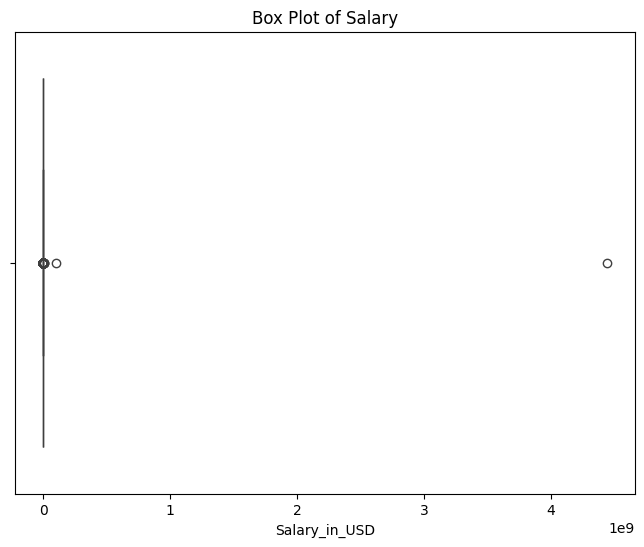

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Salary to check outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Salary_in_USD'])
plt.title('Box Plot of Salary')
plt.show()

As we see, there are fake data, will describe the Salary column to check it.

In [ ]:
df['Salary_in_USD'].describe()

,Salary_in_USD
count,2.806100e+04
mean,2.497630e+05
std,2.651214e+07
min,0.000000e+00
25%,5.300000e+04
50%,7.400000e+04
75%,1.050000e+05
max,4.440052e+09


Good, there are Zero and million salaries, will drop that.
We will get salaries are greater than 0 and less than 1 M

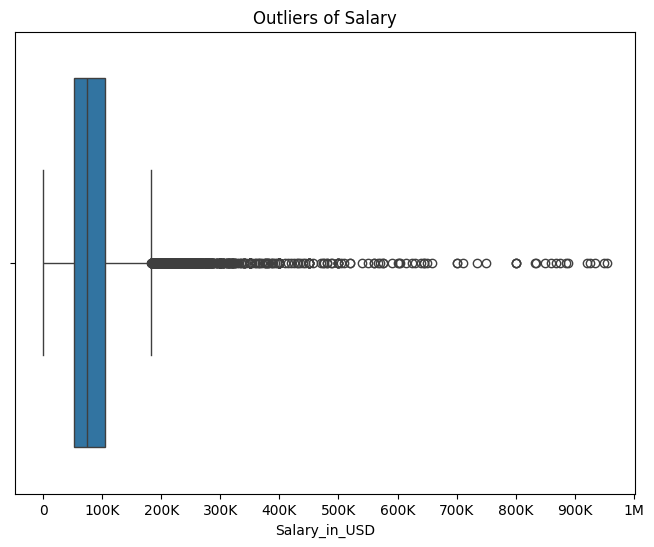

In [ ]:
# Filtering the data.
df = df[(df['Salary_in_USD'] < 1000000) & (df['Salary_in_USD'] > 0)]

# Visualize Salary to check outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Salary_in_USD'])
plt.title('Outliers of Salary')

# Customizing the X-axis ticks
x = list(range(0, 1000001, 100000))
labels = ['0', '100K', '200K', '300K', '400K', '500K', '600K', '700K', '800K', '900K', '1M']  # Corresponding labels

plt.xticks(x,labels)

plt.show()

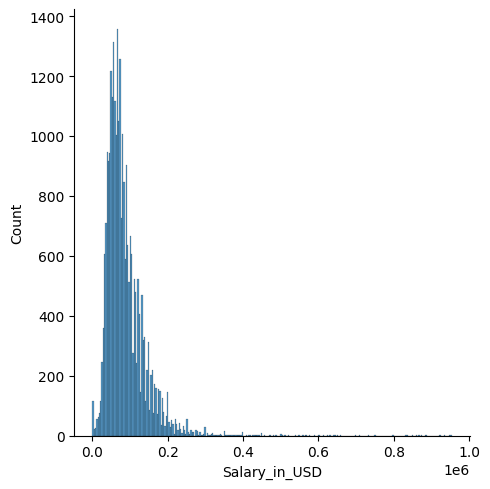

In [ ]:
sns.displot(df['Salary_in_USD'])

Good, as we see there in the BoxPlot and DisPlot that there are outliers, so we will drop it.

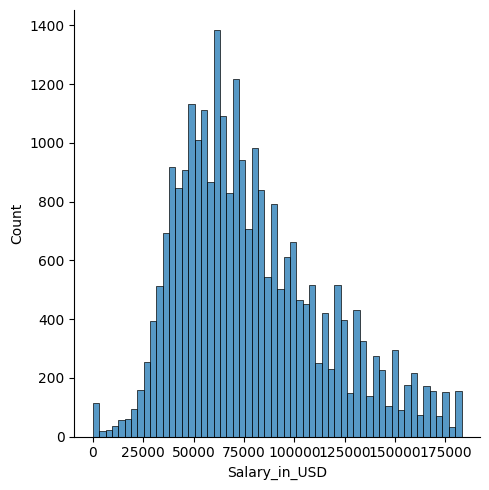

In [ ]:
# Calculate Quantiles
quantile_1 = df['Salary_in_USD'].quantile(0.25)
quantile_3 = df['Salary_in_USD'].quantile(0.75)

# Calculate the Interquartile Range
IQR = quantile_3 - quantile_1

# Define the lower and upper bounds
lower = quantile_1 - 1.5 * IQR
upper = quantile_3 + 1.5 * IQR

# Filter out the outliers
df = df[(df['Salary_in_USD'] >= lower) & (df['Salary_in_USD'] <= upper)]

# Get the outliers
outliers = df[(df['Salary_in_USD'] < lower) & (df['Salary_in_USD'] > upper)]

# Without outliers
sns.displot(df['Salary_in_USD'])

Great, **Normal Distribution**

# Start Analysis

1. Which industry pays the most?

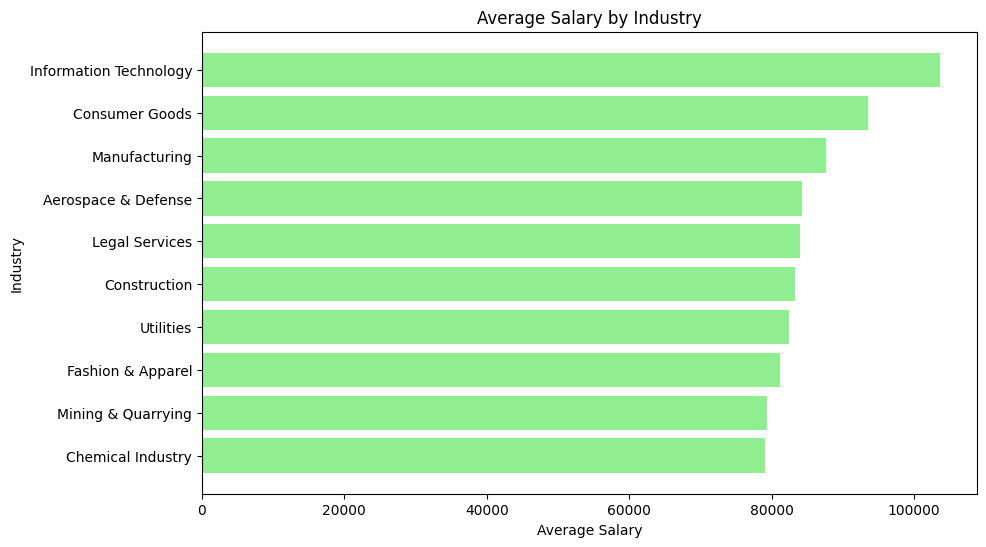

In [ ]:
Industry_most_pays_avg = df.groupby('Industry', observed=True)['Salary_in_USD'].mean().reset_index().sort_values(by='Salary_in_USD', ascending=False)[:10]

plt.figure(figsize=(10, 6))
plt.barh(Industry_most_pays_avg['Industry'], Industry_most_pays_avg['Salary_in_USD'], color='lightgreen')
plt.xlabel('Average Salary')
plt.ylabel('Industry')
plt.title('Average Salary by Industry')
plt.gca().invert_yaxis()
plt.show()

2. How does salary increase given years of experience?

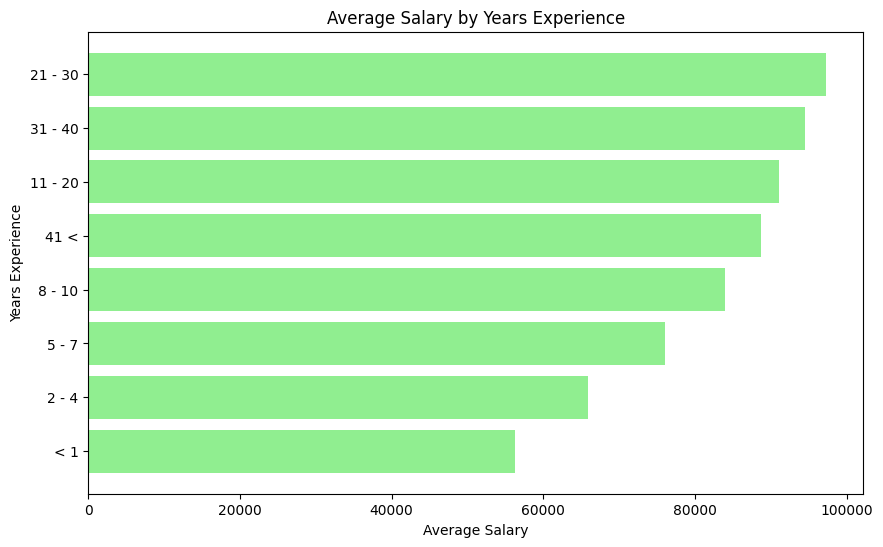

In [ ]:
experince_salaries = df.groupby('Field Years Experience', observed = True)['Salary_in_USD'].mean().reset_index().sort_values(by="Salary_in_USD", ascending = False)

plt.figure(figsize=(10, 6))
plt.barh(experince_salaries['Field Years Experience'], experince_salaries['Salary_in_USD'], color='lightgreen')
plt.xlabel('Average Salary')
plt.ylabel('Years Experience')
plt.title('Average Salary by Years Experience')
plt.gca().invert_yaxis()
plt.show()

3. How do salaries compare for the same role in different locations?
* For this question we will do some filtering, but why? Each job title is not existing in all countries, so we will take just 3 countries and most 5 repeated hob titles.
 * Contries: United States, United Kingdom, Canada
 * Job Titles: Software Engineer, Project Manager, Director, Program Manager, Teacher


In [ ]:
job_titles = ['Software Engineer', 'Project Manager', 'Director', 'Program Manager','Teacher']

countries = ['United States', 'United Kingdom', 'Canada']

salary_country_titles = df[df['Job title'].isin(job_titles) & df['Job Country'].isin(countries)][['Job title', 'Job Country', 'Salary_in_USD']]

salary_country_titles['Job title'] = salary_country_titles['Job title'].cat.remove_unused_categories()

salary_country_titles['Job Country'] = salary_country_titles['Job Country'].cat.remove_unused_categories()

salary_country_titles = salary_country_titles.groupby(['Job title', 'Job Country'], observed=False)['Salary_in_USD'].mean().reset_index().sort_values(by='Salary_in_USD', ascending=False)

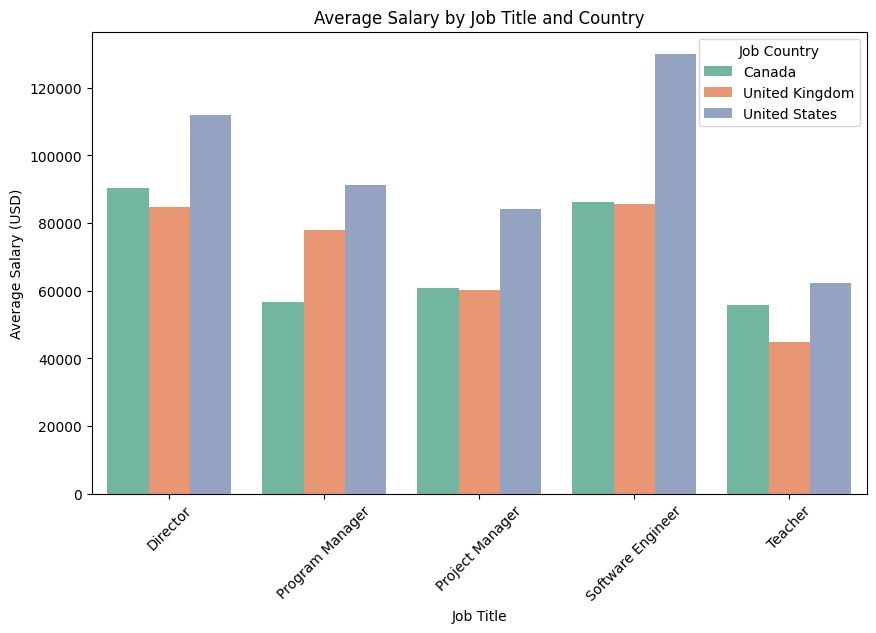

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Job title', y='Salary_in_USD', hue='Job Country', data=salary_country_titles, palette='Set2')
plt.title('Average Salary by Job Title and Country')
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()

4. How much do salaries differ by gender and years of experience?

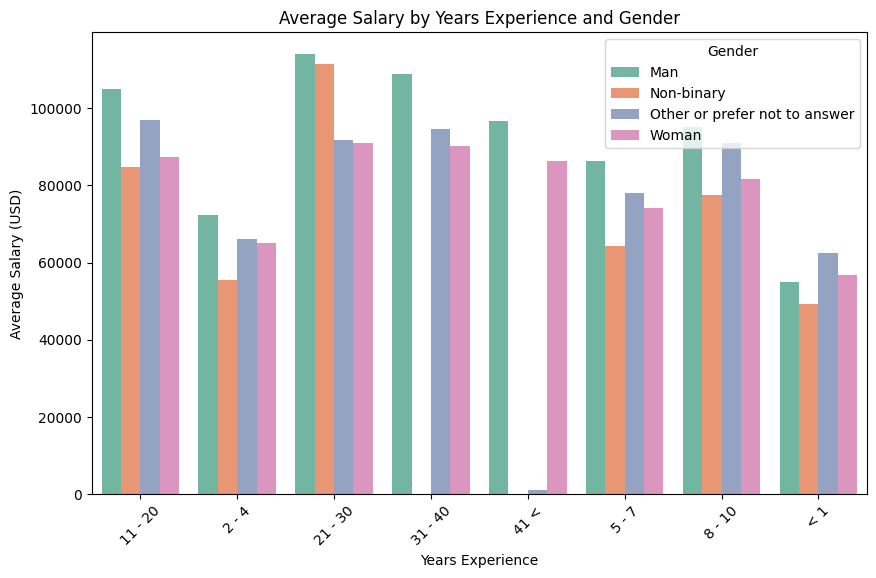

In [ ]:
gender_experience_salary = df.groupby(['Field Years Experience', 'Gender'], observed=False)['Salary_in_USD'].mean().reset_index().sort_values(by='Salary_in_USD', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Field Years Experience', y='Salary_in_USD', hue='Gender', data=gender_experience_salary, palette='Set2')
plt.title('Average Salary by Years Experience and Gender')
plt.xlabel('Years Experience')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.show()

5. How do factors like education level correlate with salary?



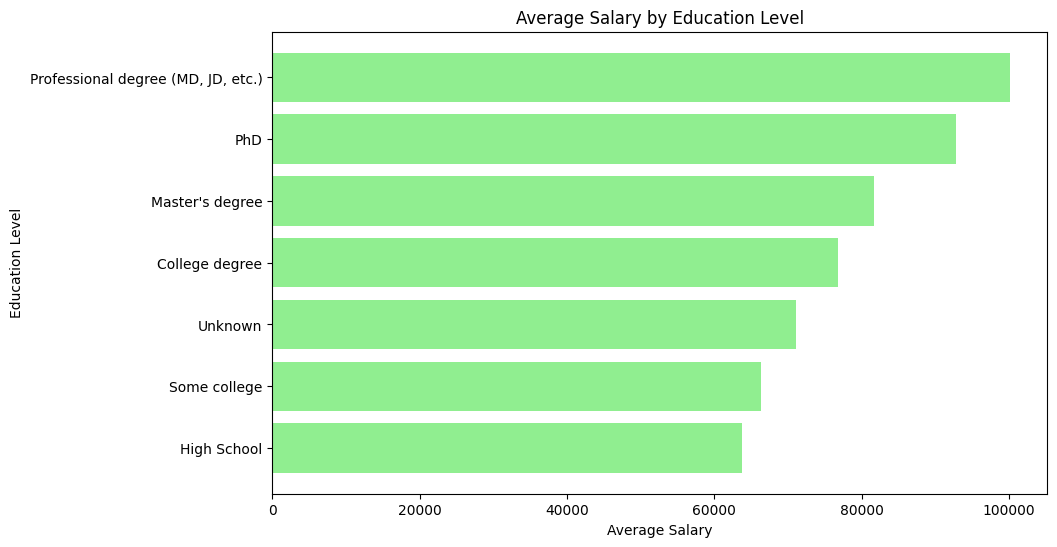

In [ ]:
experince_salaries = df.groupby('Highest Education Level', observed = True)['Salary_in_USD'].mean().reset_index().sort_values(by="Salary_in_USD", ascending = False)

plt.figure(figsize=(10, 6))
plt.barh(experince_salaries['Highest Education Level'], experince_salaries['Salary_in_USD'], color='lightgreen')
plt.xlabel('Average Salary')
plt.ylabel('Education Level')
plt.title('Average Salary by Education Level')
plt.gca().invert_yaxis()
plt.show()